In [1]:
from __future__ import print_function, division
%matplotlib inline


import os

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [2]:
import numpy as np
import modisco
import theano
print("Theano version:",theano.__version__)
import sys
print (sys.version)

Using cuDNN version 7001 on context None
Mapped name None to device cuda0: GeForce GTX TITAN X (0000:08:00.0)


Theano version: 1.0.2
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]


<HDF5 file "results.hdf5" (mode r+)>
metacluster0
activity pattern: [1 1 1]
pattern_0
total seqlets: 18208
Task 0 actual importance scores:


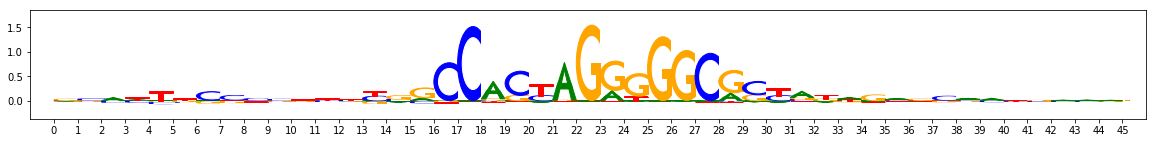

Task 1 actual importance scores:


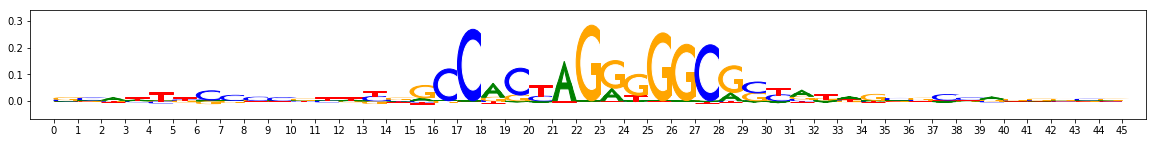

Task 2 actual importance scores:


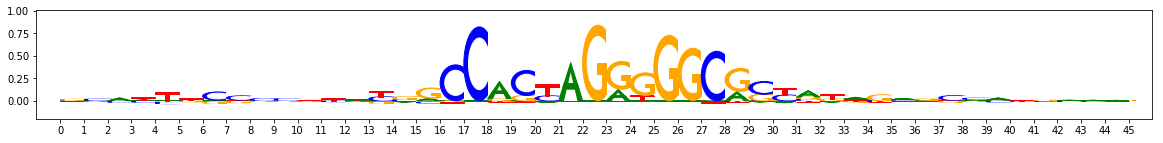

onehot, fwd and rev:


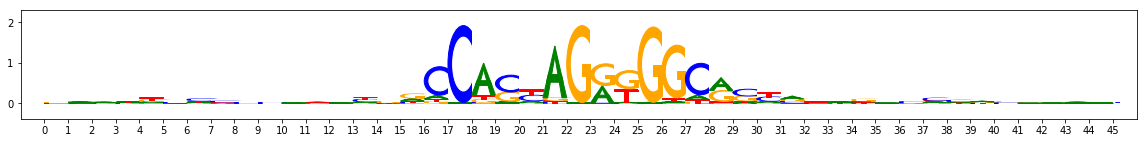

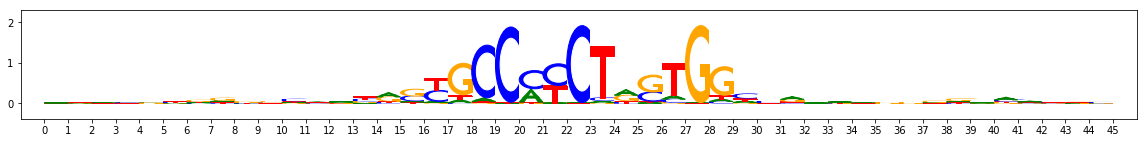

pattern_1
total seqlets: 538
Task 0 actual importance scores:


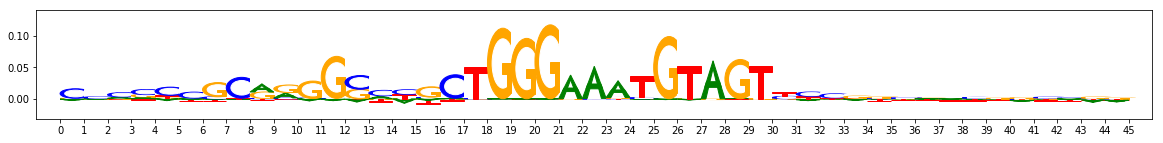

Task 1 actual importance scores:


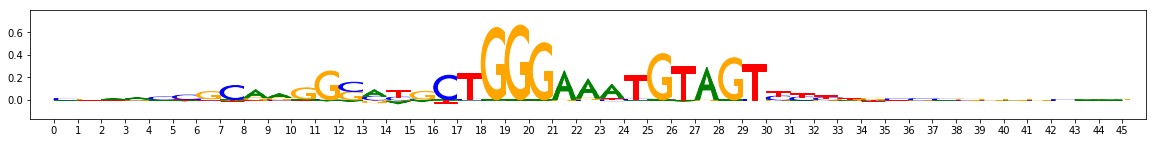

Task 2 actual importance scores:


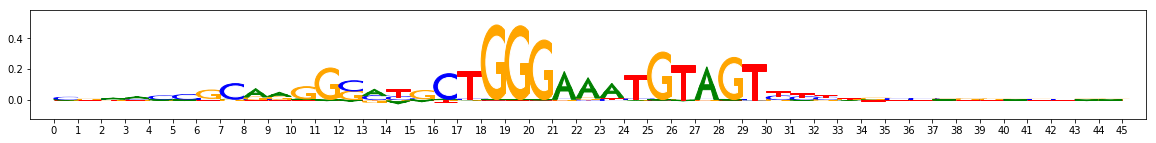

onehot, fwd and rev:


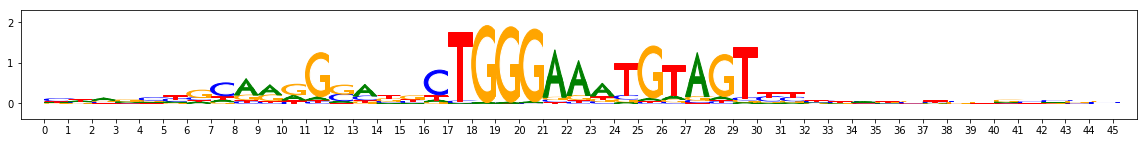

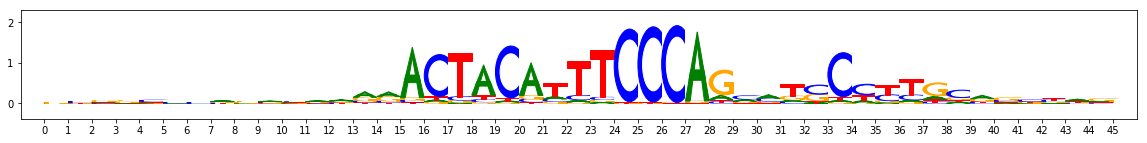

pattern_2
total seqlets: 472
Task 0 actual importance scores:


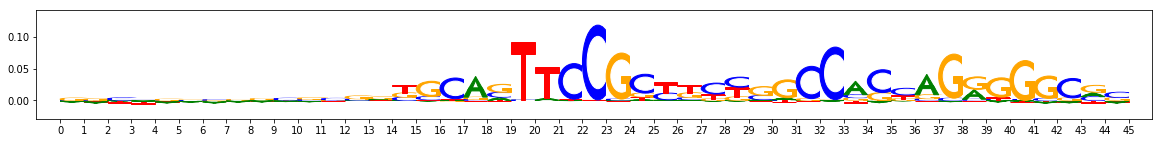

Task 1 actual importance scores:


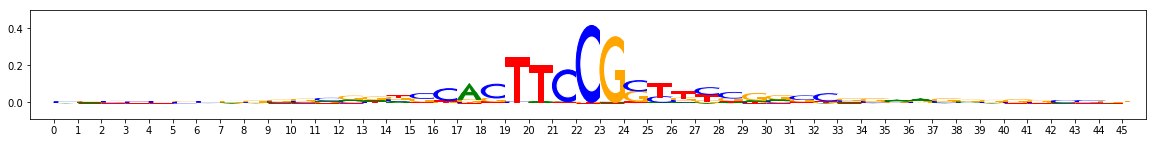

Task 2 actual importance scores:


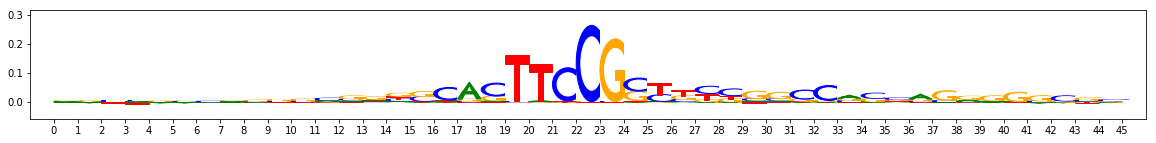

onehot, fwd and rev:


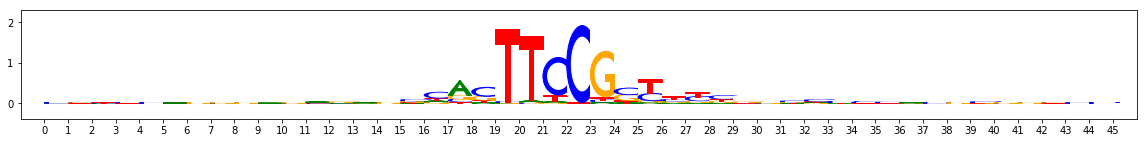

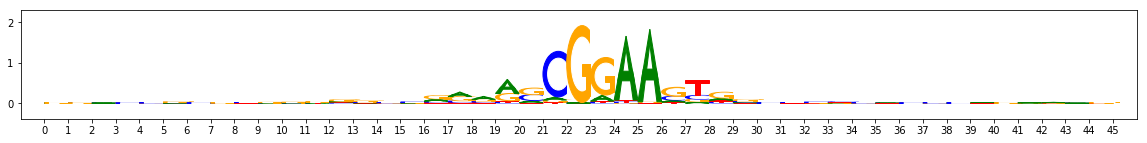

pattern_3
total seqlets: 362
Task 0 actual importance scores:


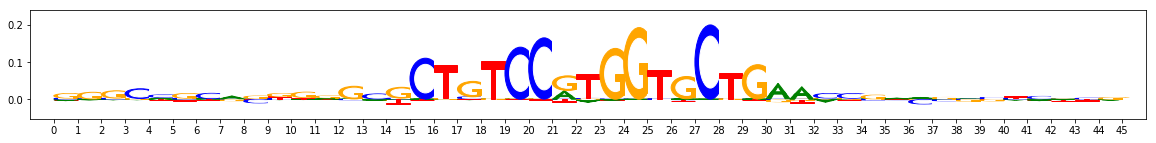

Task 1 actual importance scores:


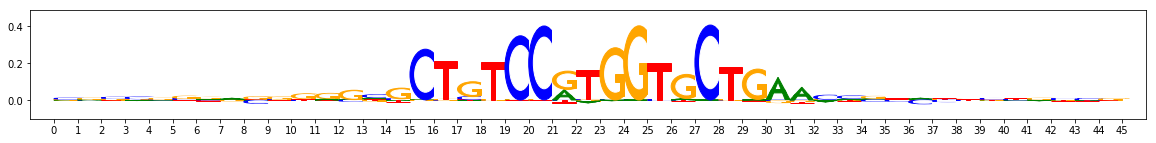

Task 2 actual importance scores:


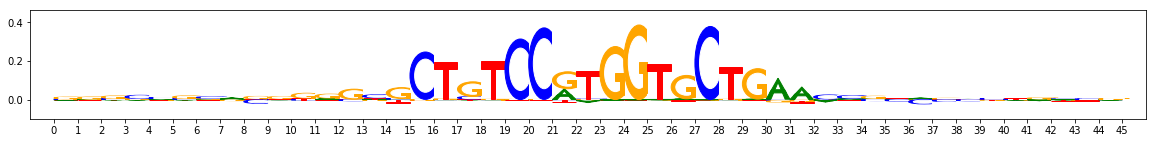

onehot, fwd and rev:


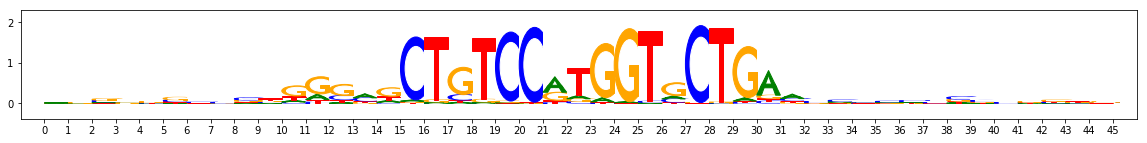

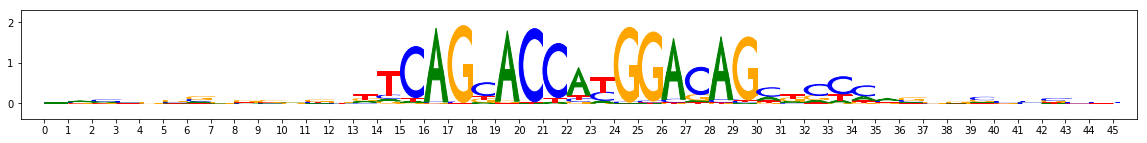

pattern_4
total seqlets: 260
Task 0 actual importance scores:


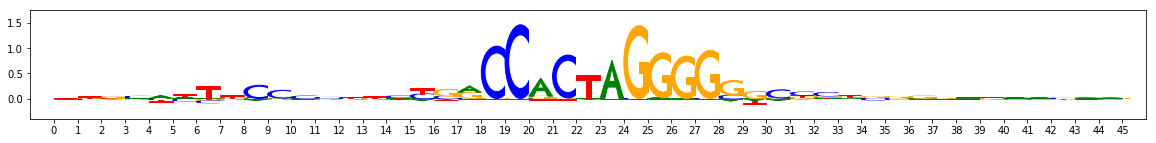

Task 1 actual importance scores:


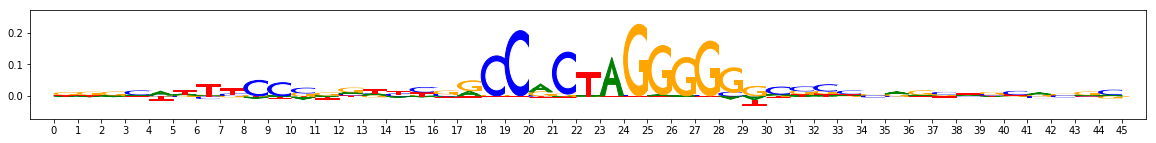

Task 2 actual importance scores:


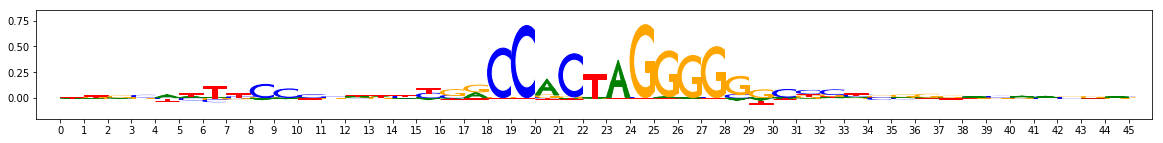

onehot, fwd and rev:


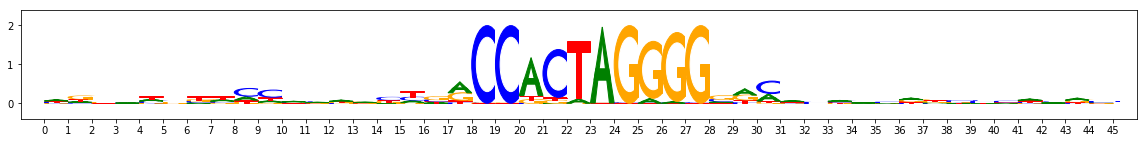

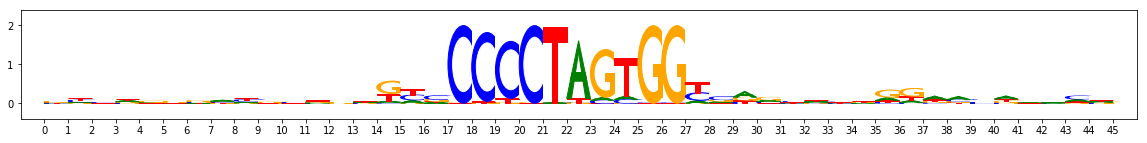

pattern_5
total seqlets: 184
Task 0 actual importance scores:


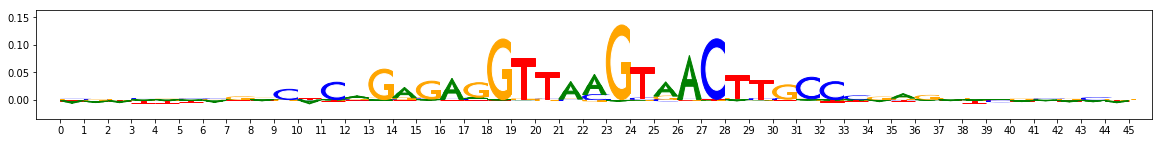

Task 1 actual importance scores:


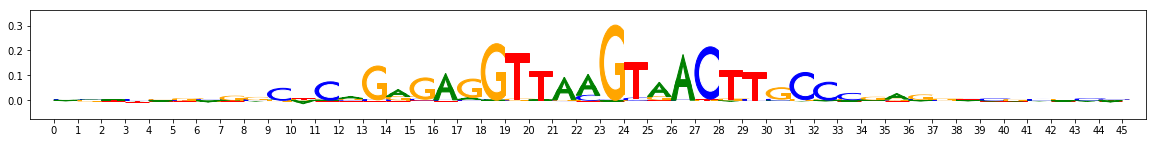

Task 2 actual importance scores:


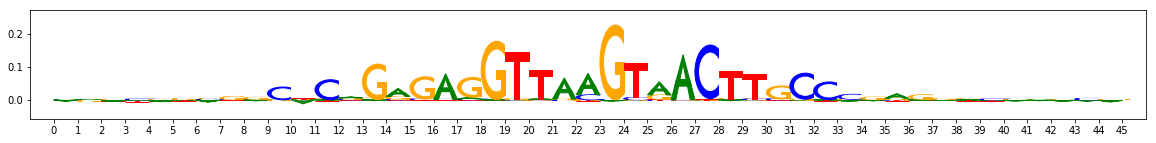

onehot, fwd and rev:


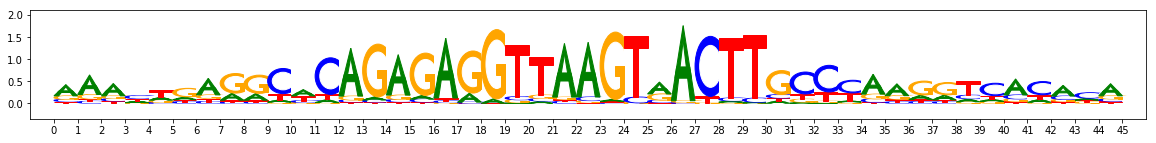

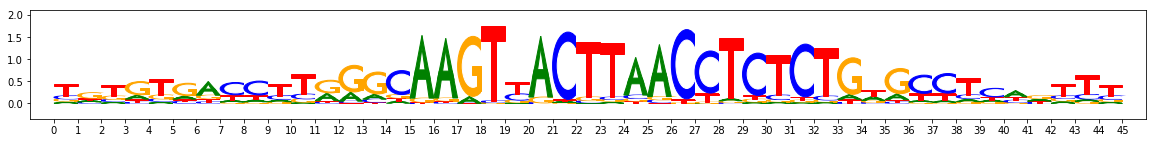

pattern_6
total seqlets: 132
Task 0 actual importance scores:


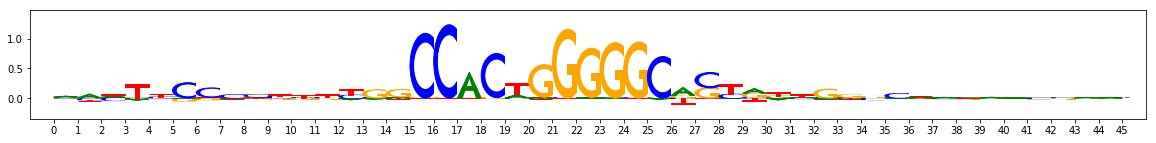

Task 1 actual importance scores:


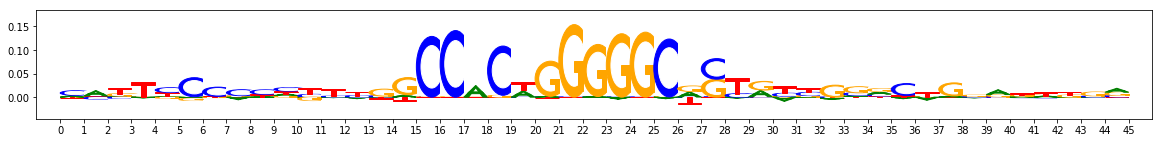

Task 2 actual importance scores:


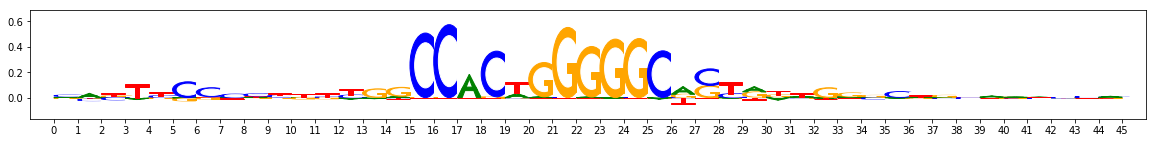

onehot, fwd and rev:


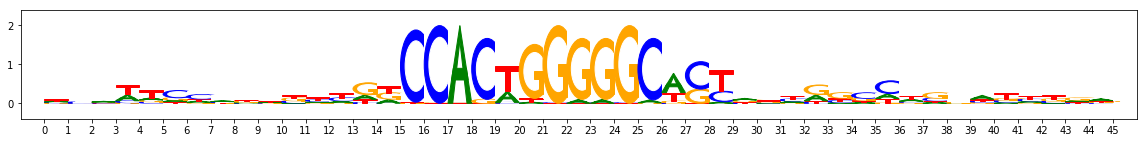

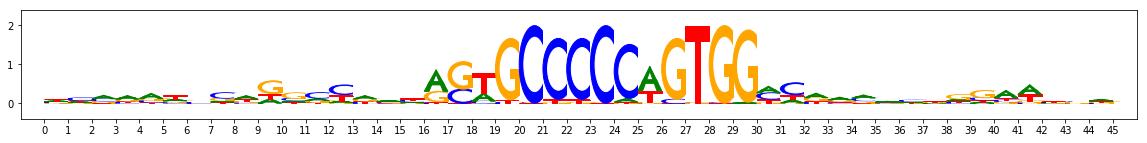

pattern_7
total seqlets: 140
Task 0 actual importance scores:


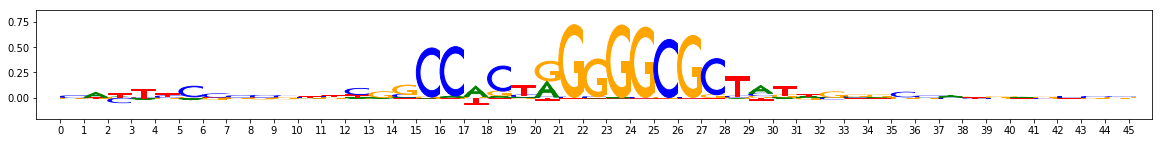

Task 1 actual importance scores:


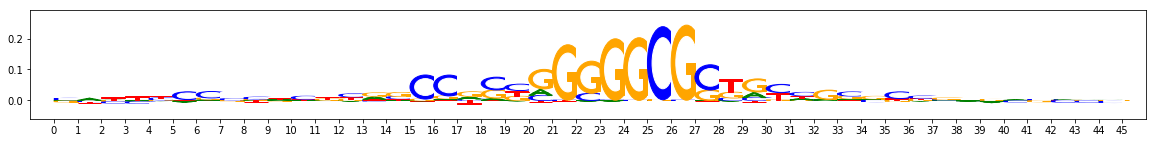

Task 2 actual importance scores:


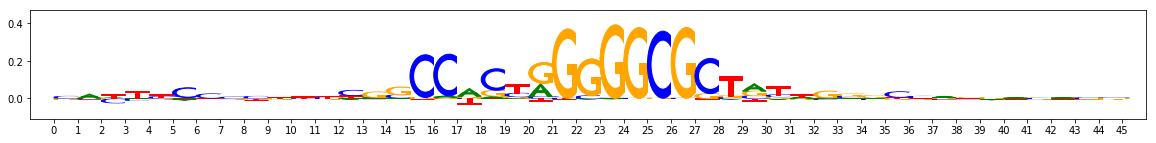

onehot, fwd and rev:


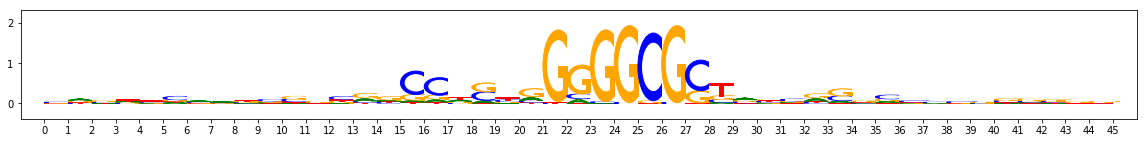

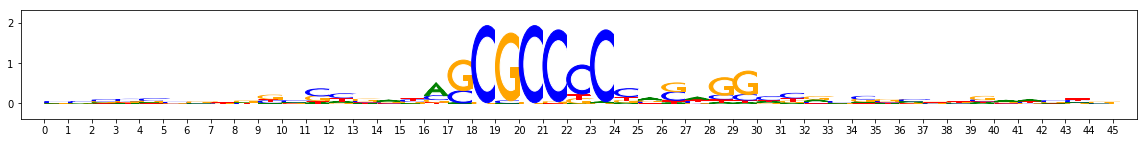

pattern_8
total seqlets: 98
Task 0 actual importance scores:


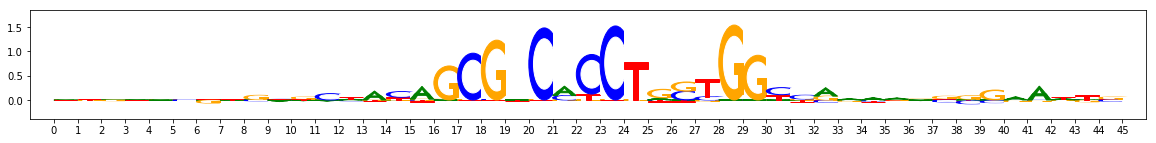

Task 1 actual importance scores:


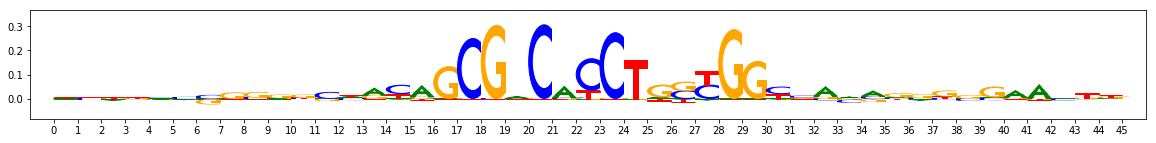

Task 2 actual importance scores:


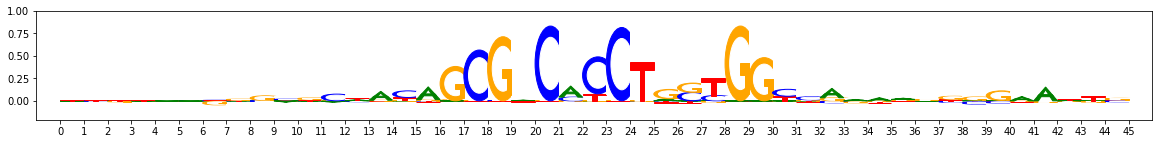

onehot, fwd and rev:


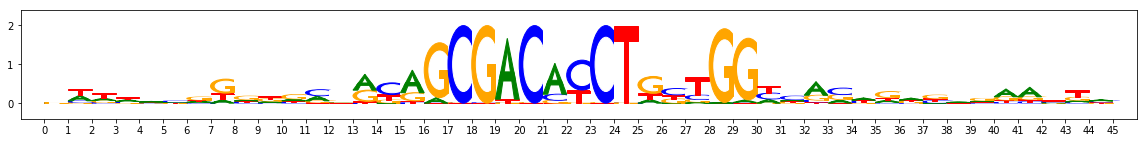

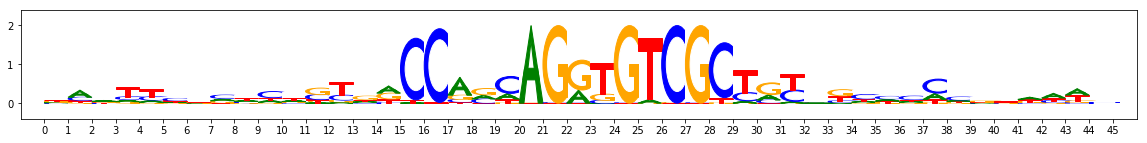

pattern_9
total seqlets: 94
Task 0 actual importance scores:


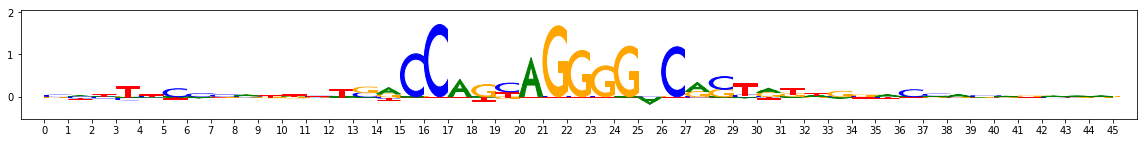

Task 1 actual importance scores:


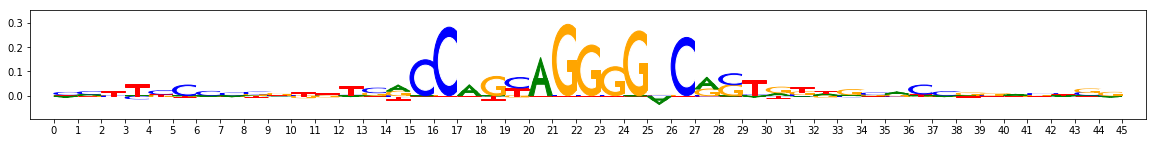

Task 2 actual importance scores:


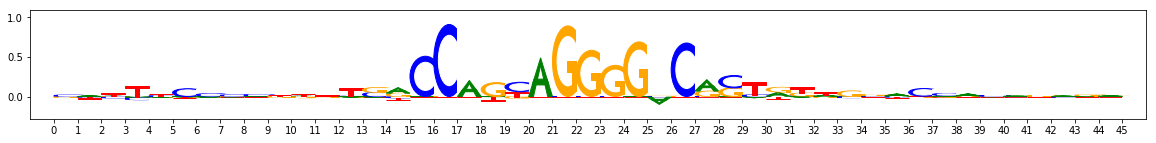

onehot, fwd and rev:


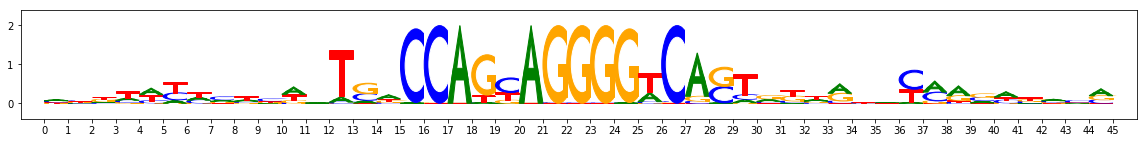

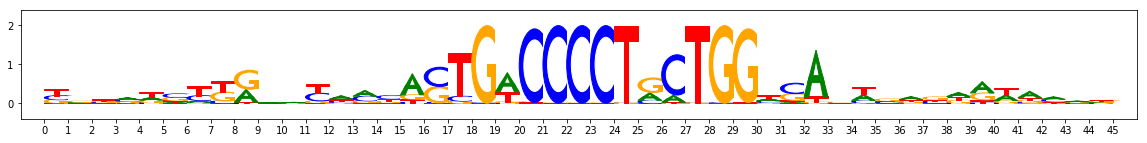

pattern_10
total seqlets: 88
Task 0 actual importance scores:


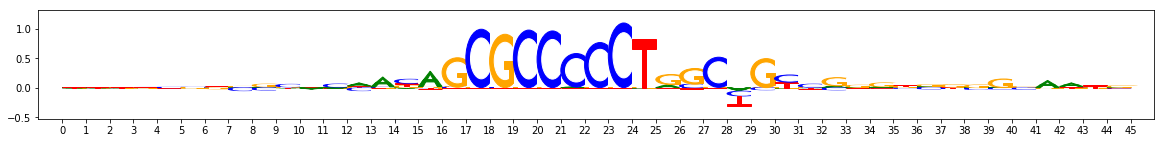

Task 1 actual importance scores:


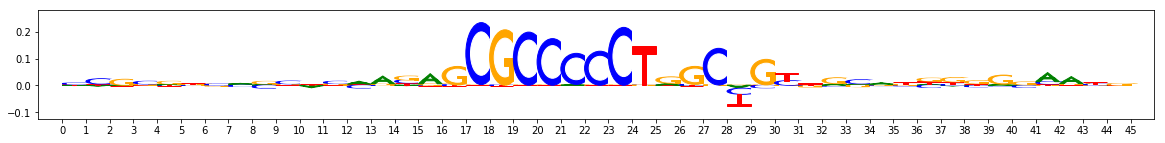

Task 2 actual importance scores:


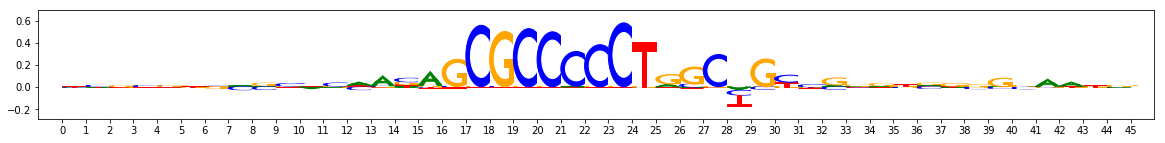

onehot, fwd and rev:


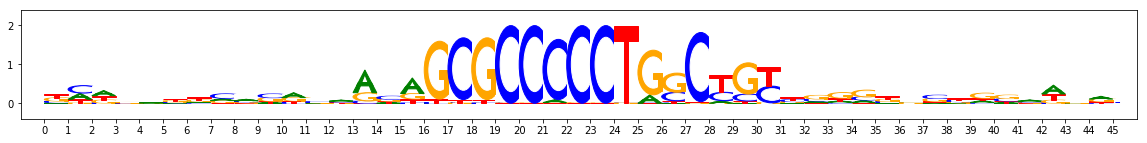

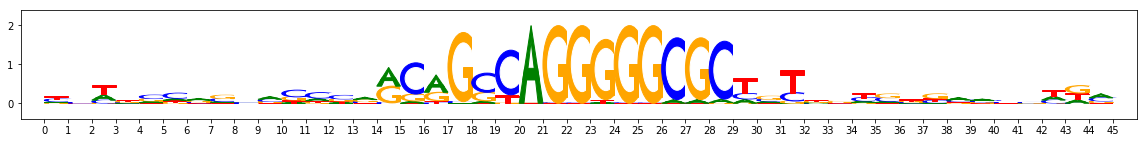

pattern_11
total seqlets: 106
Task 0 actual importance scores:


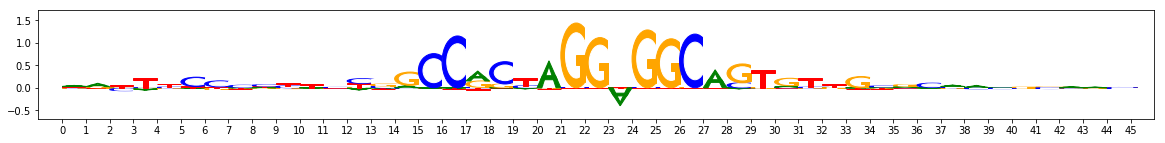

Task 1 actual importance scores:


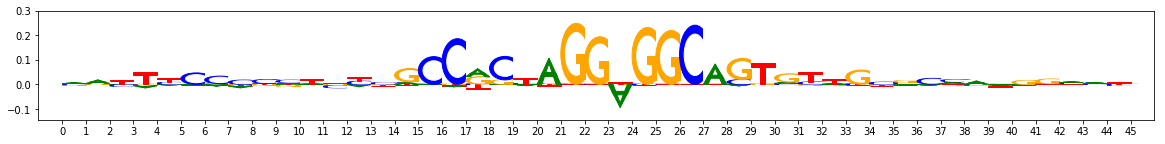

Task 2 actual importance scores:


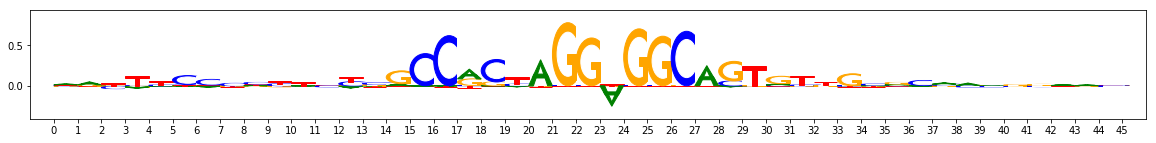

onehot, fwd and rev:


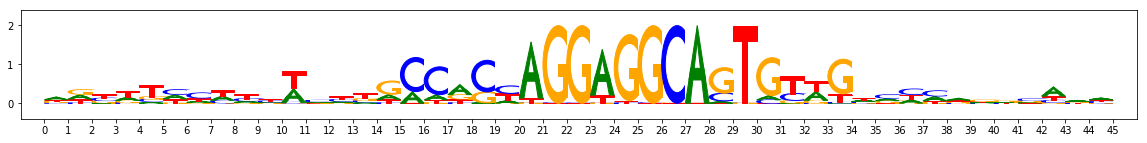

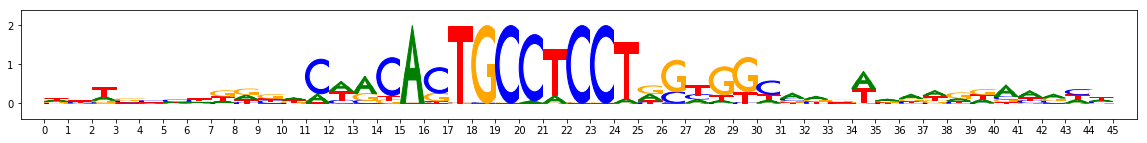

metacluster1
activity pattern: [0 1 1]
pattern_0
total seqlets: 607
Task 0 actual importance scores:


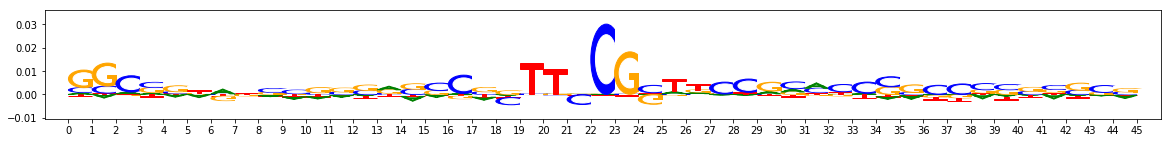

Task 1 actual importance scores:


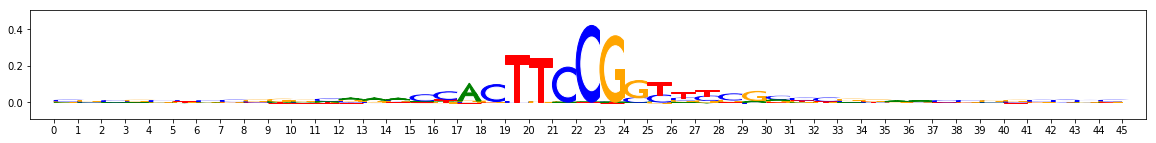

Task 2 actual importance scores:


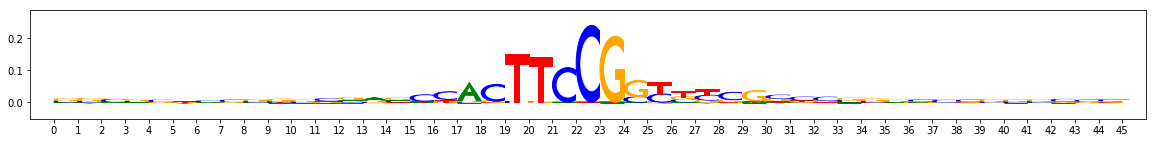

onehot, fwd and rev:


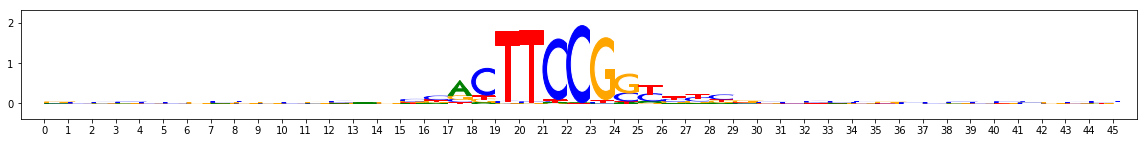

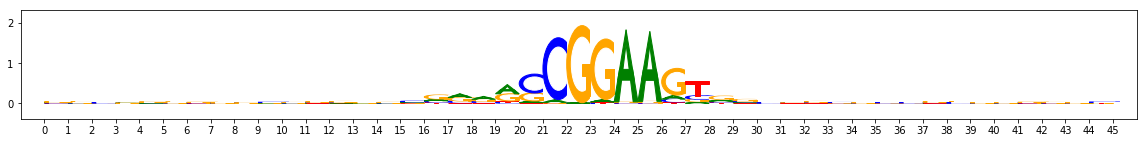

pattern_1
total seqlets: 458
Task 0 actual importance scores:


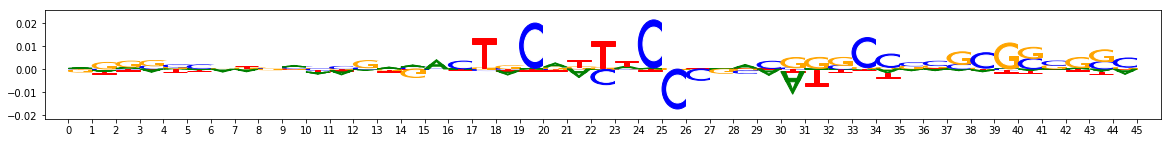

Task 1 actual importance scores:


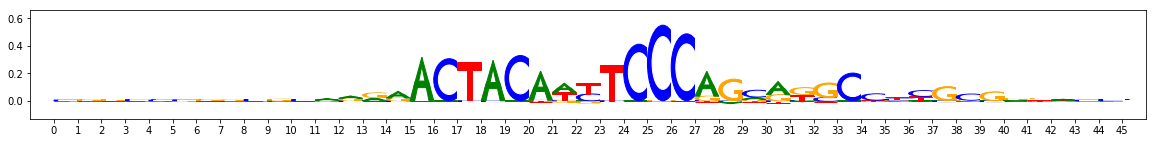

Task 2 actual importance scores:


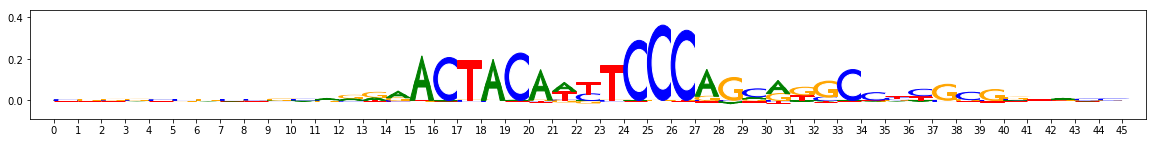

onehot, fwd and rev:


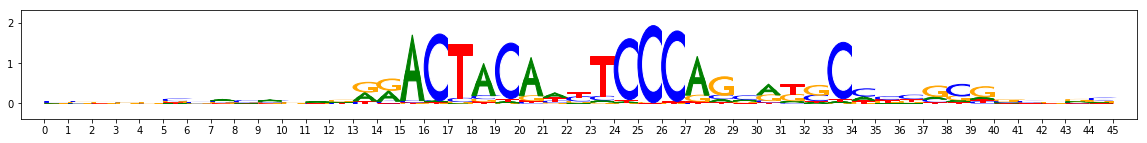

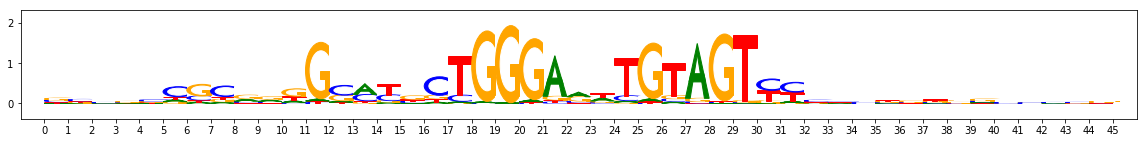

metacluster2
activity pattern: [-1  1  1]
pattern_0
total seqlets: 404
Task 0 actual importance scores:


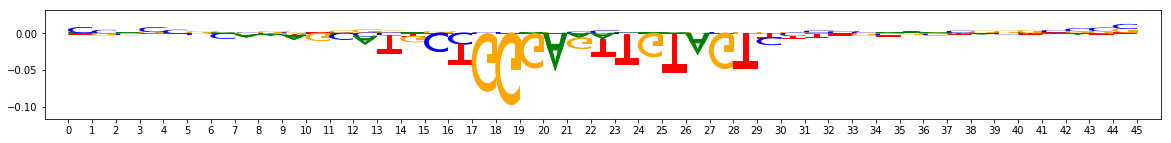

Task 1 actual importance scores:


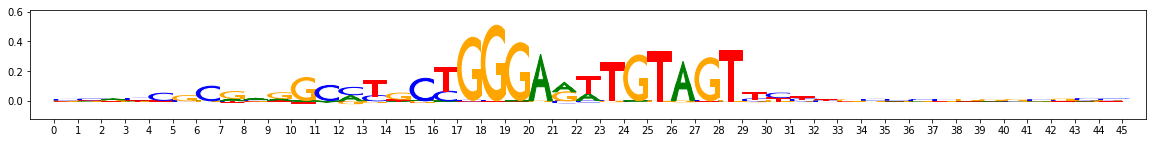

Task 2 actual importance scores:


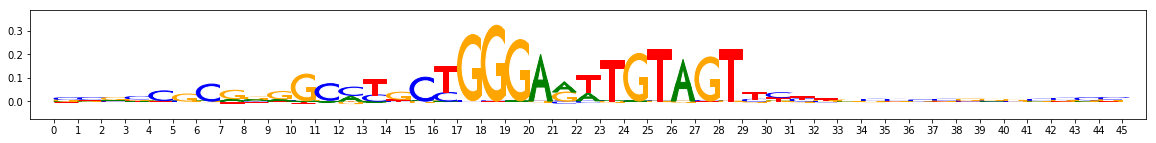

onehot, fwd and rev:


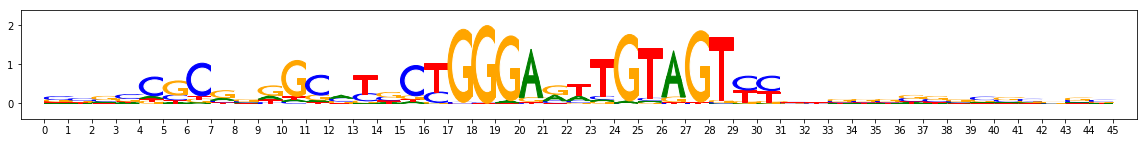

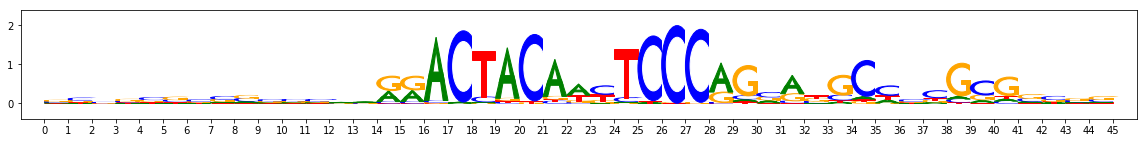

metacluster3
activity pattern: [ 1 -1  1]
pattern_0
total seqlets: 426
Task 0 actual importance scores:


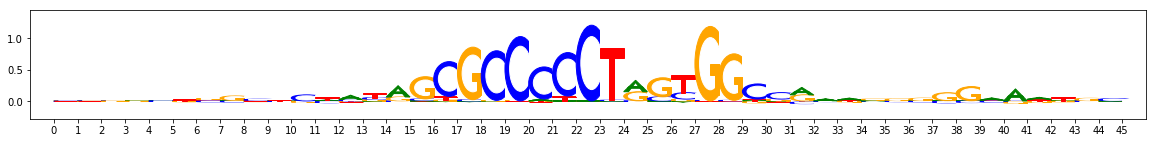

Task 1 actual importance scores:


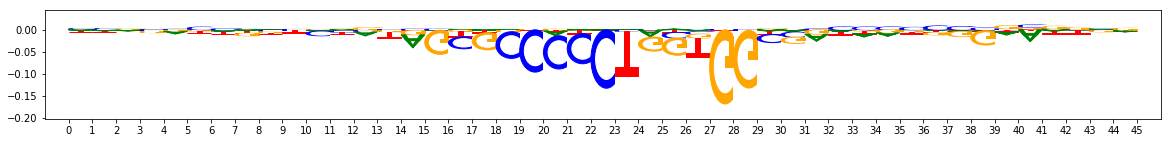

Task 2 actual importance scores:


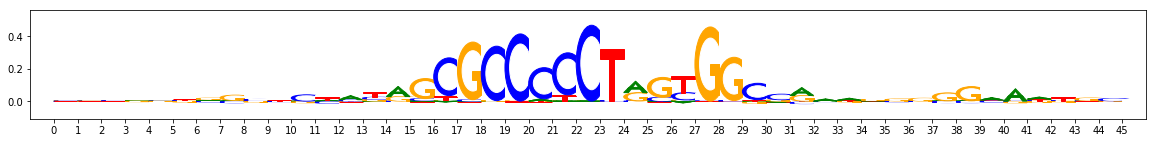

onehot, fwd and rev:


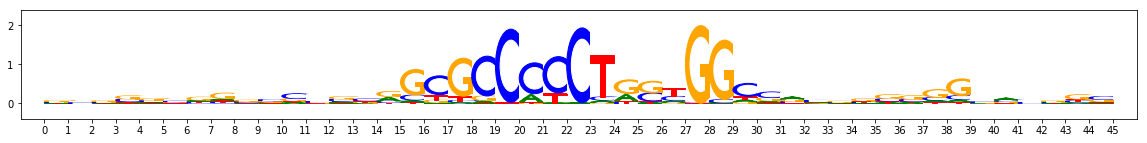

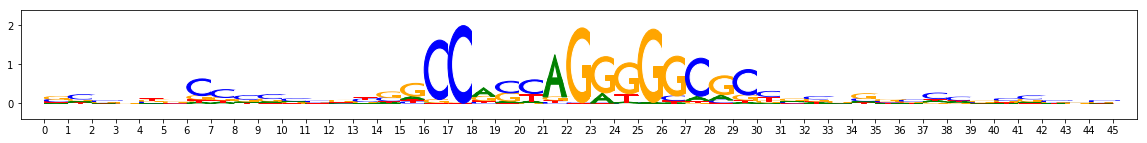

metacluster4
activity pattern: [-1 -1 -1]
pattern_0
total seqlets: 283
Task 0 actual importance scores:


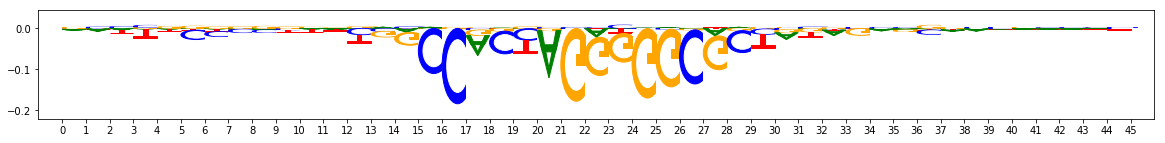

Task 1 actual importance scores:


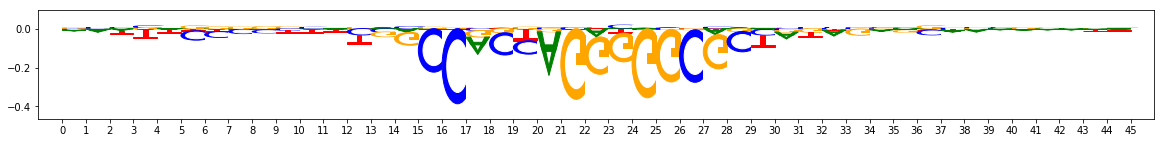

Task 2 actual importance scores:


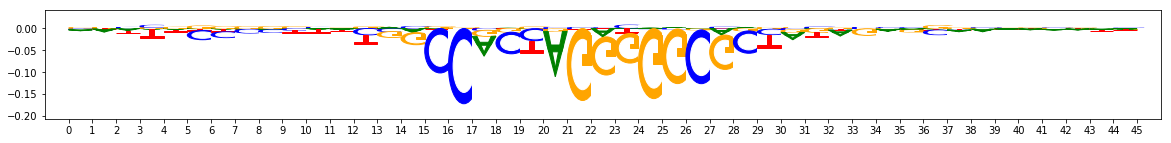

onehot, fwd and rev:


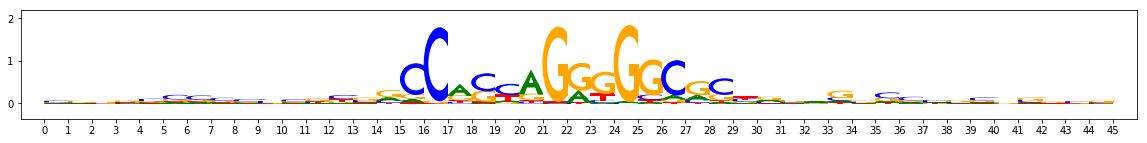

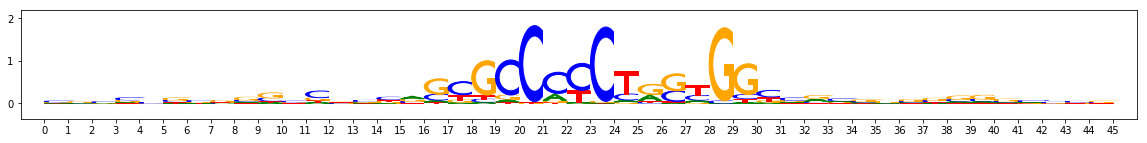

metacluster5
activity pattern: [1 0 1]
pattern_0
total seqlets: 366
Task 0 actual importance scores:


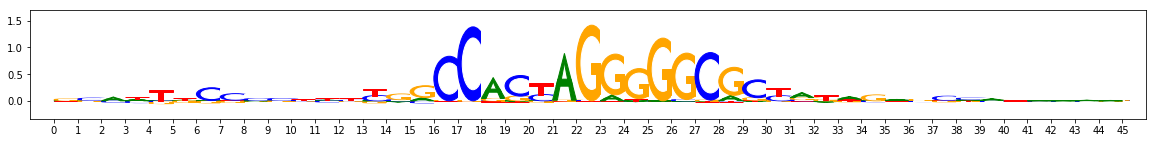

Task 1 actual importance scores:


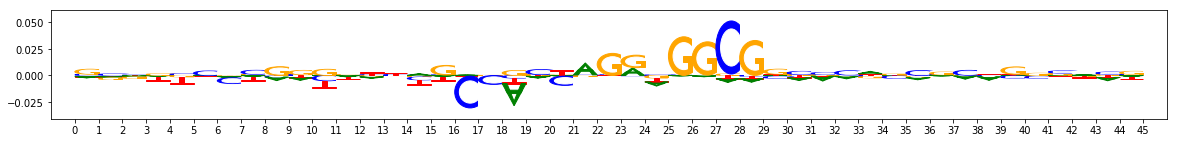

Task 2 actual importance scores:


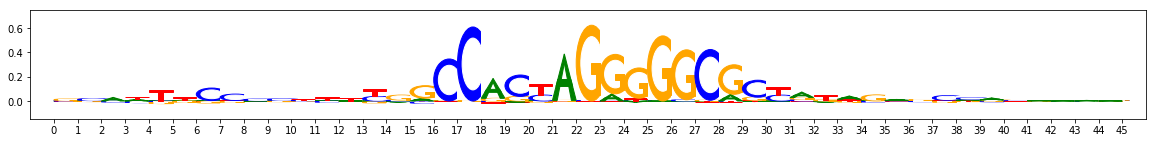

onehot, fwd and rev:


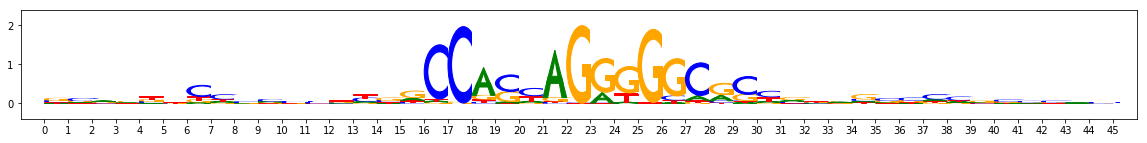

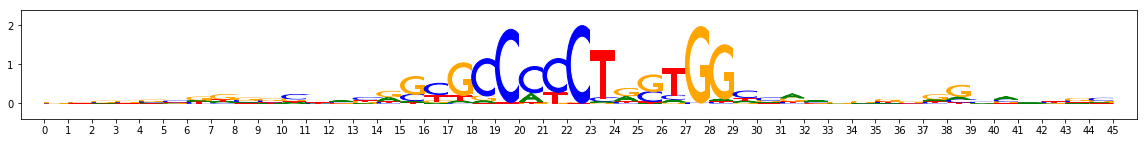

In [5]:
import h5py

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5")
print(hdf5_results)

metacluster_names = list(hdf5_results["metaclustering_results"]["all_metacluster_names"][:])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = (list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:]))
    for pattern_name in all_pattern_names:
        print(pattern_name)
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        #print("Task 0 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        print("Task 1 actual importance scores:")
        viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        print("Task 2 actual importance scores:")
        viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()